In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/home/jburdano/code/Techlab/virtualwater/"
fil =  "New_1960-2016.csv" #"watertofood_data_21crops_11countries_1960-2016.csv" 
df = pd.read_csv(path+fil, ";",header=1)
df = df.mask(df==0)
df#.head(25)

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,67.596703,67.490303,67.621696,...,155.539001,173.072998,176.309998,145.723999,160.794998,302.752991,177.143005,157.955994,132.710007,251.289993
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,1601.750000,1525.469971,1690.540039,...,1422.300049,1414.449951,1329.170044,1745.650024,1409.689941,1252.089966,1606.729980,1680.609985,1756.510010,2152.719971
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,148.216995,146.811996,135.082001,...,95.588402,88.136299,87.707802,90.581497,75.778297,80.972298,84.542801,77.037201,116.822998,88.053802
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,562.728027,415.609985,617.362000,...,589.810974,746.117981,660.210022,685.169006,689.297974,697.112000,694.752014,692.406006,690.057007,687.744019
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,209.169998,211.339005,185.434998,...,47.731300,41.110500,39.060101,46.044498,43.460999,42.093102,40.094002,40.202702,46.184299,49.357101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Turkey,223,TR,Peaches and nectarines,534,Fruits,m3/ton,412.639008,564.107971,660.062012,...,322.292999,312.679993,316.028992,332.688995,319.437012,302.345001,286.256012,301.548004,288.308014,279.402008
221,Turkey,223,TR,Pears,521,Fruits,m3/ton,2116.879883,2353.770020,2114.280029,...,570.627014,556.927002,506.083008,514.526978,522.273987,506.510010,491.851013,511.062988,519.911011,519.427002
222,Turkey,223,TR,Potatoes,116,Vegetables,m3/ton,360.167999,316.497009,301.210999,...,124.535004,121.663002,112.501999,106.475998,106.234001,122.775002,109.168999,106.092003,111.228996,104.871002
223,Turkey,223,TR,"Pumpkins, squash and gourds",394,Vegetables,m3/ton,206.451996,214.074997,214.514008,...,370.717987,344.897003,347.770996,404.756989,481.828003,506.578003,519.609009,590.611023,681.226990,738.070007


In [37]:
df2000 = pd.pivot_table(df, values=df.iloc[:,47:50],aggfunc=np.mean, index=["Country Name"], columns=["Item Name"])
df2016 = pd.pivot_table(df, values=df.iloc[:,60:63],aggfunc=np.mean, index=["Country Name"], columns=["Item Name"])
df_diff = pd.DataFrame(df2016.iloc[:,::15].mean(axis=1) - df2000.iloc[:,::15].mean(axis=1))
df_diff.rename(columns={0:"Apples"}, inplace=True)
df_diff15y = df_diff.copy()

i=1
for item in df["Item Name"].unique()[1:]:
    df_tmp = pd.Series(df2016.iloc[:,i::15].mean(axis=1) - df2000.iloc[:,i::15].mean(axis=1), 
                       index = df2000.index)
    #display(item, df_tmp)
    df_diff15y[item] = df_tmp
    i+=1
    del df_tmp
df_diff15y.dropna(axis=0,how="all",inplace=True)
df_diff15y

,Apples,Asparagus,Carrots and turnips,Cherries,"Chillies and peppers, green",Cucumbers and gherkins,Grapes,Lettuce and chicory,Maize,Mushrooms and truffles,Peaches and nectarines,Pears,Potatoes,"Pumpkins, squash and gourds",Tomatoes
Country Name,,,,,,,,,,,,,,,
Austria,-8.618668,732.203328,1.834333,-50.976644,-41.434934,-18.624933,120.919678,28.447032,-36.508677,-8.508169,-134.004560,-52.430664,-12.606669,32.337399,-9.974899
Belgium,-6.470665,-219.369019,-5.308431,-284.541361,-33.750301,-3.434967,-47.625992,-34.372199,33.914327,-82.285736,NaN,-110.112002,-3.487300,92.275935,-4.989216
France,-0.447001,-762.710042,-12.820930,-64.746704,-9.127899,22.568367,-22.839986,3.904666,-39.380005,-82.285736,-30.231323,-38.081991,-6.439535,32.483103,-11.216266
Germany,-42.464335,-348.773336,-13.841300,1040.189351,-7.257727,-15.614334,6.085337,-27.019297,-55.408335,-8.508169,-1012.256327,55.691666,-15.417864,20.891500,-10.149067
Greece,-117.986003,-253.039998,-15.651998,-250.893311,-1.194832,-6.777835,-56.394999,71.386327,-41.552327,10.744132,36.520345,37.551666,-28.225001,935.697314,-13.148335
Hungary,-149.625656,38.540039,-14.284367,73.732666,-115.777468,-17.475665,81.909312,4.834302,-182.485657,-70.538661,-567.225972,-142.578318,-24.977336,21.682999,-62.503831
Italy,-39.991999,-131.063354,-11.175237,240.530029,2.749003,11.768995,-76.089335,-21.056000,-80.518331,10.744132,-82.575694,-9.256663,-23.631332,-14.056063,-14.678530
Morocco,-85.287008,-757.090332,-33.786326,-1708.033366,-20.397499,18.236468,-449.149333,0.000000,-5668.056315,20.170268,112.633016,-64.343302,-47.431666,-17.559634,-31.206266
Netherlands,-34.205671,6.623006,-8.600564,-893.166992,-1.147147,-0.389370,15574.819926,20.752566,-73.904668,-67.855764,NaN,-132.142339,-1.024534,-0.203332,-0.599090


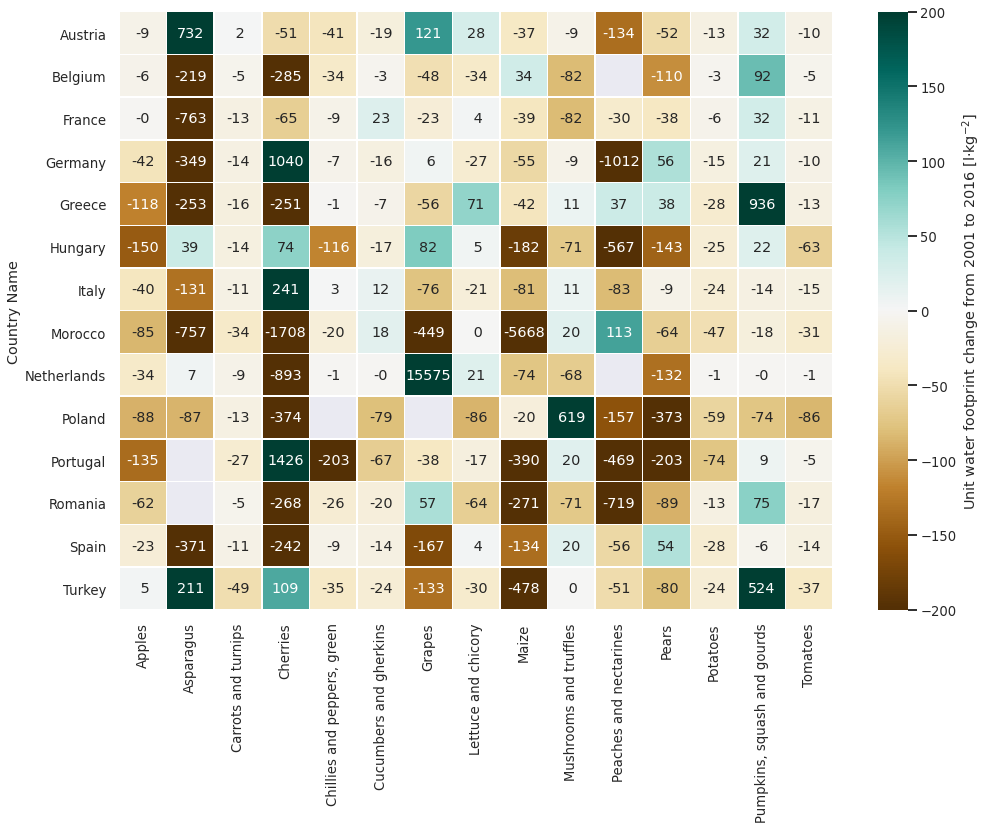

In [42]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(df_diff15y, annot=True, fmt="2.0f", linewidths=.5, 
            ax=ax, center=1, cbar=True, cmap='BrBG', vmin=-200, vmax=200,
            cbar_kws={"label":"Unit water footprint change from 2001 to 2016 [l$\cdot$kg$^{-2}$]"});

In [10]:
apl = apl.xs("Apples", axis=1, level=1)
apl.columns.names = ["Year"]
apl=apl.T
apl

Country Name,Austria,Belgium,France,Germany,Greece,Hungary,Italy,Morocco,Netherlands,Poland,Portugal,Romania,Serbia,Spain,Turkey
Year,,,,,,,,,,,,,,,
1961,67.596703,NaN,314.213013,147.557999,1032.219971,793.695984,345.308990,1493.619995,147.557999,793.695984,1493.619995,793.695984,NaN,378.425995,759.383972
1962,67.490303,NaN,140.919998,134.328995,985.594971,794.267029,343.261993,1802.640015,134.328995,794.267029,1802.640015,794.267029,NaN,550.429016,749.981995
1963,67.621696,NaN,280.997986,144.279007,1180.439941,292.627014,321.244995,1363.750000,144.279007,292.627014,1363.750000,292.627014,NaN,326.963989,770.604004
1964,69.349701,NaN,215.936005,102.946999,887.518005,786.434021,319.376007,1394.050049,102.946999,786.434021,1394.050049,786.434021,NaN,599.421021,770.416016
1965,65.536598,NaN,199.044006,110.668999,1130.739990,788.299011,352.277008,1306.930054,110.668999,788.299011,1306.930054,788.299011,NaN,513.083008,733.934021
1966,48.826500,NaN,276.739014,96.711304,851.745972,471.208008,306.037994,1393.520020,96.711304,48.826500,1393.520020,471.208008,NaN,575.109009,670.916016
1967,38.897499,NaN,165.798996,70.456398,777.218018,410.800995,355.865997,1394.030029,70.456398,38.897499,1394.030029,410.800995,NaN,656.484009,495.661987
1968,90.912697,NaN,184.492004,113.275002,763.992004,417.109985,358.085999,1412.619995,113.275002,90.912697,1412.619995,417.109985,NaN,546.221985,383.722992
1969,49.207100,NaN,201.294006,67.002602,696.172974,383.088989,292.632996,1290.030029,67.002602,49.207100,1290.030029,383.088989,NaN,605.304016,437.213013


In [42]:
apl_15y_trend = pd.DataFrame(apl.loc[['2014','2015','2016'],:].mean(axis=0) - 
                             apl.loc[['2002','2003','2004'],:].mean(axis=0))
#apl_15y_trend.columns.name = "Apples"
apl_15y_trend

,0
Country Name,
Austria,26.756999
Belgium,-1.168327
France,0.646332
Germany,-31.299998
Greece,-100.839335
Hungary,-89.692327
Italy,-39.257334
Morocco,136.772970
Netherlands,-25.586001


In [48]:
apl_15y_trend.columns.name = "Crop Name"
apl_15y_trend
#df_15ydiff = pd.DataFrame(apl_15y_trend, index=apl_15y_trend.index)
#df_15ydiff

Crop Name,0
Country Name,
Austria,26.756999
Belgium,-1.168327
France,0.646332
Germany,-31.299998
Greece,-100.839335
Hungary,-89.692327
Italy,-39.257334
Morocco,136.772970
Netherlands,-25.586001


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


ValueError: num must be 1 <= num <= 16, not 17

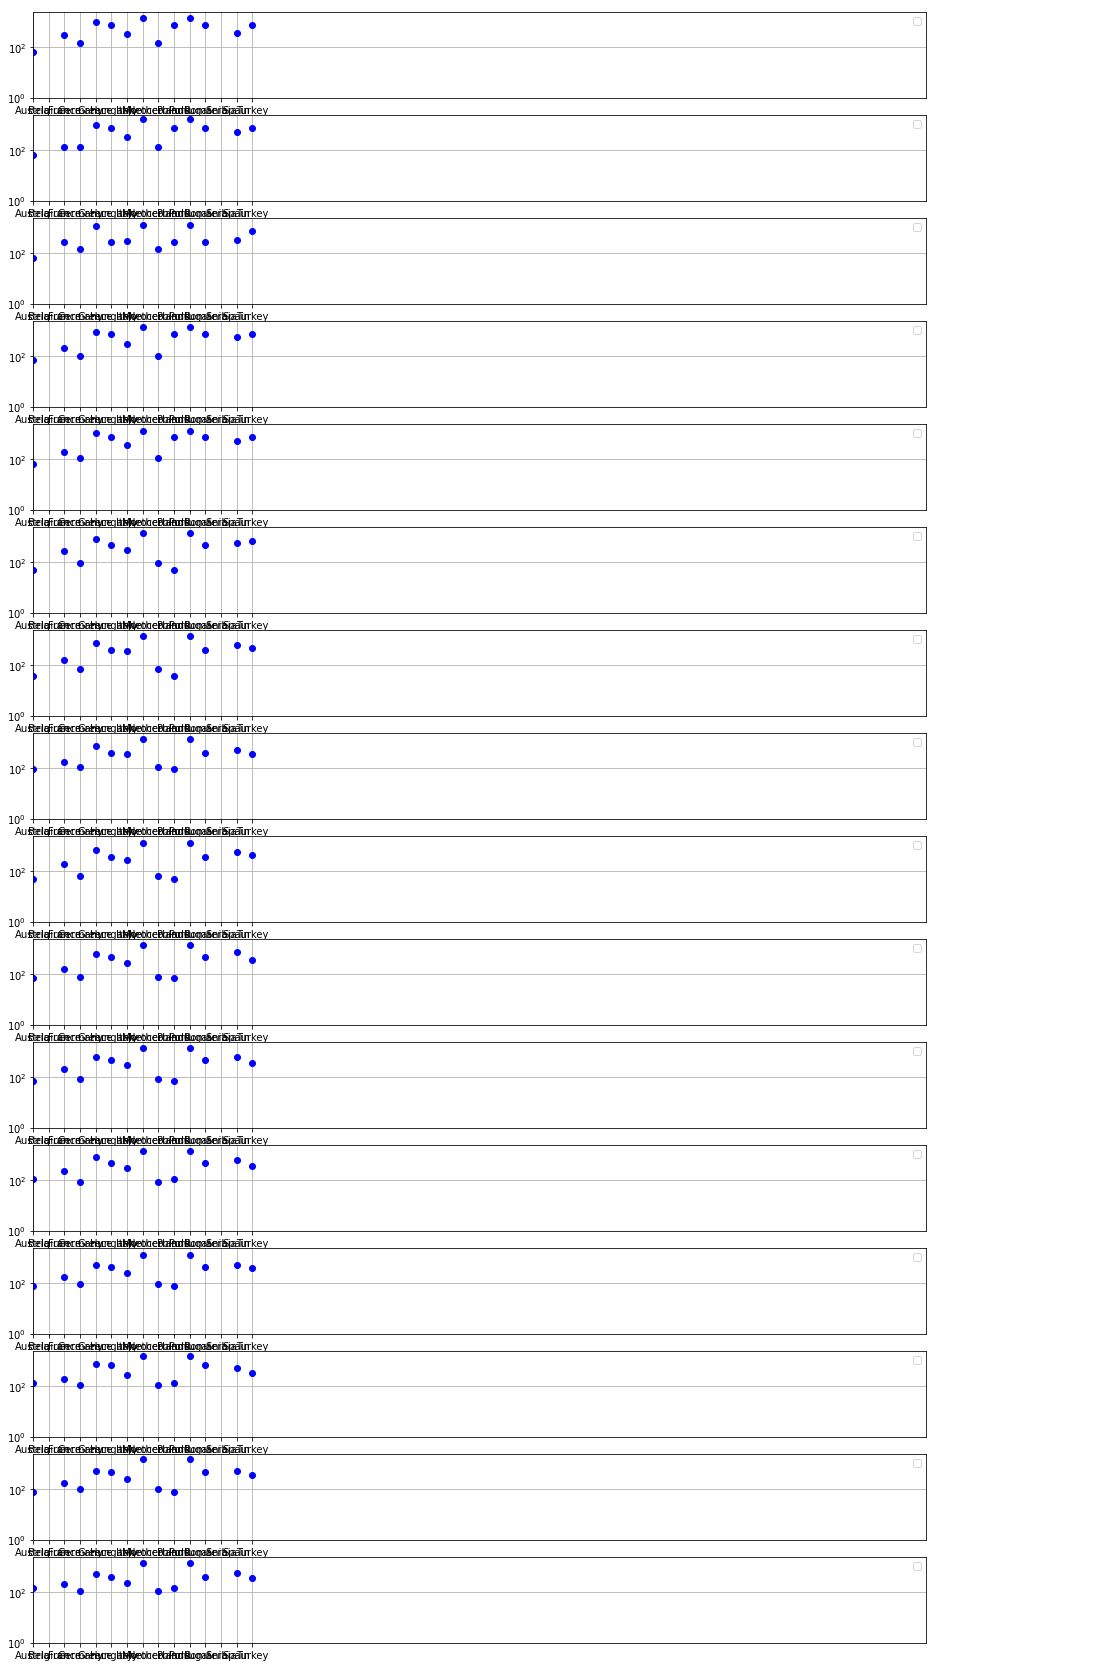

In [9]:
#fig,ax = plt.subplots(figsize=(8, 18), sharex= True) #
plt.figure(figsize=(16, 30))
j=1
for i in apl.columns:
    print(j)
    plt.subplot(15,1,j)
    plt.axis([0, 2017-1960, 1, 2500])
    plt.legend(i)
    plt.yscale('log')
    plt.grid(True)
    j+=1
    plt.plot(apl.index,apl[i], "bo", markersize=6, label=i);
    plt.annotate(i, xy=(2017-1955, 2000), xytext=(2017-1955, 2000))
#ax.plot(x, x**3, label='cubic')  # ... and some more.
#ax.set_xlabel('Year')  # Add an x-label to the axes.
#ax.set_ylabel('uWF [$l\cdot kg^{-1}$]')  # Add a y-label to the axes.
#ax.set_title("Water Footprint over time");
#plt.legend()

In [ ]:
apl_y = apl.copy()
apl_y["Year"] = apl.index
apl_y["Year"] = pd.to_numeric(apl_y["Year"])
apl_y["Year"][0]

In [ ]:
#g = sns.PairGrid(apl, height=12, aspect=0.9) 
#g.map(sns.regplot, color=".2", order=1);
#g.set(xlim=(1960, 2020), xticks=[1960,1980,2000,2020]);
#apl.index.name
f, ax = plt.subplots(figsize=(15, 10))
#g = sns.PairGrid(apl_y, x_vars=["Year"], y_vars=list(apl_y.columns[:-1]), height=2, aspect=3.9) #df4.columns[1:]
#g.map(sns.regplot, color=".2", order=1)
#
for i in apl_y.columns[:-1]:
    g = sns.regplot(x="Year", y=i, data=apl_y, ax=ax); #, hue="smoker", col="time"
g.set(xlim=(1960, 2020), xticks=[1960,1980,2000,2020]);
